In [9]:
import numpy as np
import matplotlib.pyplot as plt
%run ExoTides_analytic.ipynb # get analytic model functions

In [10]:
## import processed LMDZ data ##

## import alpha (albedo) data

alpha_list = np.load('./LMDZ_processed/alpha/alpha_grey_alphalist.npy')

alpha_lag = np.load('./LMDZ_processed/alpha/alpha_grey_lag.npy')
alpha_amp = np.load('./LMDZ_processed/alpha/alpha_grey_amp.npy')
alpha_im_q = np.load('./LMDZ_processed/alpha/alpha_grey_im_q.npy')


## import S data ## 

S_list = np.load('./LMDZ_processed/S/S_grey_alphalist.npy')
S_lag = np.load('./LMDZ_processed/S/S_grey_lag.npy')
S_amp = np.load('./LMDZ_processed/S/S_grey_amp.npy')
S_im_q = np.load('./LMDZ_processed/S/S_grey_im_q.npy')


## combine S and alpha (to get ASR) #

S_alpha_list = (1-alpha_list)*1137 # ASR
S_S_list = 0.8*S_list # ASR, alpha = 0.2

ASR_list = np.concatenate([S_alpha_list, S_S_list])
ASR_sort = np.argsort(ASR_list)
ASR_list = ASR_list[ASR_sort]
ASR_imq = np.concatenate([alpha_im_q, S_im_q])[ASR_sort]
ASR_lag = np.concatenate([alpha_lag, S_lag])[ASR_sort]
ASR_amp = np.concatenate([alpha_amp, S_amp])[ASR_sort]


## import tau_lw data

taulw_list = np.load('./LMDZ_processed/tau_lw/taulw_grey_taulwlist.npy')
taulw_lag = np.load('./LMDZ_processed/tau_lw/taulw_grey_lag.npy')
taulw_amp = np.load('./LMDZ_processed/tau_lw/taulw_grey_amp.npy')
taulw_im_q = np.load('./LMDZ_processed/tau_lw/taulw_grey_im_q.npy')



## import tau_sw data

tausw_list = np.load('./LMDZ_processed/tau_sw/tausw_grey_tausw_list.npy')
tausw_lag = np.load('./LMDZ_processed/tau_sw/tausw_grey_lag.npy')
tausw_amp = np.load('./LMDZ_processed/tau_sw/tausw_grey_amp.npy')
tausw_im_q = np.load('./LMDZ_processed/tau_sw/tausw_grey_im_q.npy')

## import ps data

# no rayleigh scattering

ps_list = np.load('./LMDZ_processed/ps_noray/ps_grey_pslist.npy')
ps_lag = np.load('./LMDZ_processed/ps_noray/ps_grey_lag.npy')
ps_amp = np.load('./LMDZ_processed/ps_noray/ps_grey_amp.npy')
ps_im_q = np.load('./LMDZ_processed/ps_noray/ps_grey_im_q.npy')

# including rayleigh scattering

ps_ray_list = np.load('./LMDZ_processed/ps/ps_list.npy')
ps_ray_lag = np.load('./LMDZ_processed/ps/ps_lag.npy')
ps_ray_amp = np.load('./LMDZ_processed/ps/ps_amp.npy')
ps_ray_im_q = np.load('./LMDZ_processed/ps/ps_im_q.npy')

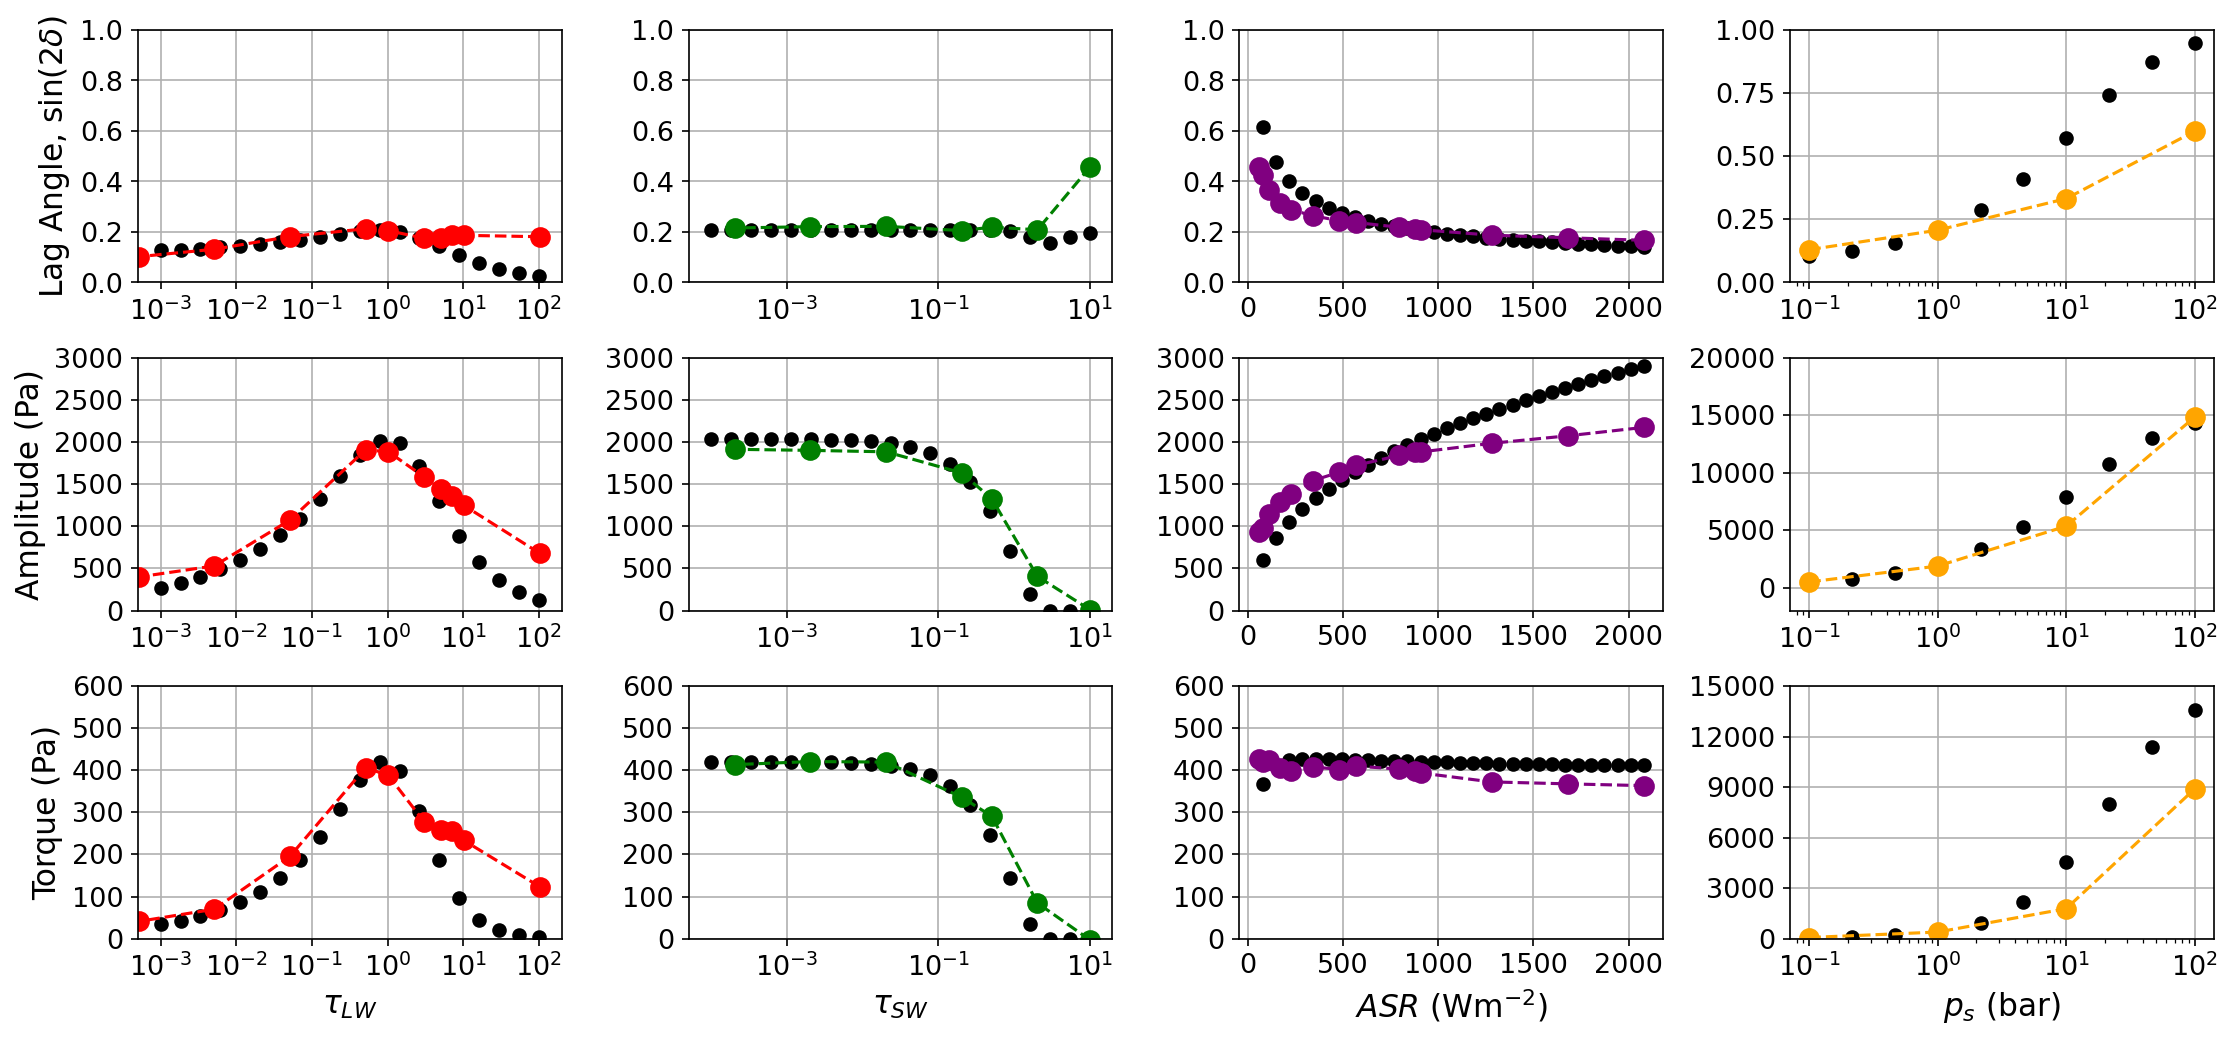

In [11]:
fig, ax = plt.subplots(3,4, dpi =150, figsize = (15,7),tight_layout = True)

res_rot = 1.75

taulw_o = 1

tau_lw_list = 10**np.linspace(-3,2, 20)
tau_sw_list = 10**np.linspace(-4,1, 20)
Slist = np.linspace(100, 2600, 30)
alpha_list_ana = np.linspace(0.05,0.95, 20)
p_s_list = 10**np.linspace(-1, 2, 10)

## tau_lw 


ax[2,0].set_axisbelow(True)
ax[1,0].set_axisbelow(True)
ax[0,0].set_axisbelow(True)
ax[2,0].grid()
ax[1,0].grid()
ax[0,0].grid()

ax[2,0].set_xscale('log')
ax[1,0].set_xscale('log')
ax[0,0].set_xscale('log')

ax[2,0].set_ylim(-100,600)
ax[1,0].set_ylim(-100,2500)
ax[0,0].set_ylim(-0.1,1)


for tau_lw in tau_lw_list:
    torque = torque_analytic(1137, 0.2, 0.001, tau_lw, 1*bar, res_rot*n,n)
    amp = amp_analytic(1137, 0.2, 0.001, tau_lw, 1*bar, res_rot*n,n)
    lag = lag_analytic(1137, 0.2, 0.001, tau_lw, 1*bar, res_rot*n,n)
    ax[2,0].scatter(tau_lw, torque, color = 'k')
    ax[1,0].scatter(tau_lw, amp, color = 'k')
    ax[0,0].scatter(tau_lw, lag, color = 'k')
    
   

ax[2,0].scatter(taulw_list, taulw_im_q, color = 'r', s = 80)
ax[2,0].plot(taulw_list, taulw_im_q, 'r--')

ax[1,0].scatter(taulw_list, taulw_amp, color = 'r', s = 80)
ax[1,0].plot(taulw_list, taulw_amp, 'r--')

ax[0,0].scatter(taulw_list, taulw_lag, color = 'r', s = 80)
ax[0,0].plot(taulw_list, taulw_lag, 'r--')

ax[2,0].set_ylabel('Torque, $\\tilde{q}$ (Pa)', fontsize=15)
ax[1,0].set_ylabel('Amplitude (Pa)', fontsize=15)
ax[0,0].set_ylabel('$\sin(2\delta)$', fontsize=15)

# ax[1,0].tick_params(labelbottom=False)
# ax[0,0].tick_params(labelbottom=False)
ax[2,0].set_xlabel('$\\tau_{LW}$', fontsize = 15)


ax[2,0].set_axisbelow(True)
ax[1,0].set_axisbelow(True)
ax[0,0].set_axisbelow(True)


ax[2,0].set_xscale('log')
ax[1,0].set_xscale('log')
ax[0,0].set_xscale('log')

ax[2,0].set_xlim(5e-4,2e2)
ax[1,0].set_xlim(5e-4,2e2)
ax[0,0].set_xlim(5e-4,2e2)

ax[2,0].set_xticks([1e-3,1e-2,1e-1,1,10,100])
ax[1,0].set_xticks([1e-3,1e-2,1e-1,1,10,100])
ax[0,0].set_xticks([1e-3,1e-2,1e-1,1,10,100])

ax[2,0].set_ylim(-100,600)
ax[1,0].set_ylim(-100,2500)
ax[0,0].set_ylim(-0.1,1)


## tau_sw 

ax[2,1].set_axisbelow(True)
ax[1,1].set_axisbelow(True)
ax[0,1].set_axisbelow(True)
ax[2,1].grid()
ax[1,1].grid()
ax[0,1].grid()

ax[2,1].set_xscale('log')
ax[1,1].set_xscale('log')
ax[0,1].set_xscale('log')


ax[2,1].set_ylim(-100,600)
ax[1,1].set_ylim(-100,2500)
ax[0,1].set_ylim(-0.1,1)

ax[2,1].set_xlim(5e-5,2e1)
ax[1,1].set_xlim(5e-5,2e1)
ax[0,1].set_xlim(5e-5,2e1)

for tau_sw in tau_sw_list:
    torque = torque_analytic(1137, 0.2, tau_sw, taulw_o, 1*bar, res_rot*n,n)
    amp = amp_analytic(1137, 0.2, tau_sw, taulw_o, 1*bar, res_rot*n,n)
    lag = lag_analytic(1137, 0.2, tau_sw, taulw_o, 1*bar, res_rot*n,n)
    ax[2,1].scatter(tau_sw, torque, color = 'k')
    ax[1,1].scatter(tau_sw, amp, color = 'k')
    ax[0,1].scatter(tau_sw, lag, color = 'k')
    
   

ax[2,1].scatter(tausw_list, tausw_im_q, color = 'g', s = 80)
ax[2,1].plot(tausw_list, tausw_im_q, 'g--')

ax[1,1].scatter(tausw_list, tausw_amp, color = 'g', s = 80)
ax[1,1].plot(tausw_list, tausw_amp, 'g--')

ax[0,1].scatter(tausw_list, np.absolute(tausw_lag), color = 'g', s = 80)
ax[0,1].plot(tausw_list, np.absolute(tausw_lag), 'g--')


# ax[1,1].tick_params(labelbottom=False)
# ax[0,1].tick_params(labelbottom=False)
ax[2,1].set_xlabel('$\\tau_{SW}$', fontsize = 15)

## albedo


ax[2,2].set_axisbelow(True)
ax[1,2].set_axisbelow(True)
ax[0,2].set_axisbelow(True)
ax[2,2].grid()
ax[1,2].grid()
ax[0,2].grid()




ax[2,2].set_ylim(-100,600)
ax[1,2].set_ylim(-100,4000)
ax[0,2].set_ylim(-0.1,1)


for S in Slist:
    torque = torque_analytic(S, 0.2, 0.0001, taulw_o, 1*bar, res_rot*n,n)
    amp = amp_analytic(S, 0.2, 0.0001, taulw_o, 1*bar, res_rot*n,n)
    lag = lag_analytic(S, 0.2, 0.0001, taulw_o, 1*bar, res_rot*n,n)
    ax[2,2].scatter(S*0.8, torque, color = 'k')
    ax[1,2].scatter(S*0.8, amp, color = 'k')
    ax[0,2].scatter(S*0.8, lag, color = 'k')
    
   

ax[2,2].scatter(ASR_list, ASR_imq, color = 'purple', s = 80)
ax[2,2].plot(ASR_list, ASR_imq, color='purple',linestyle='--')

ax[1,2].scatter(ASR_list, ASR_amp, color = 'purple', s = 80)
ax[1,2].plot(ASR_list, ASR_amp, color='purple',linestyle='--')

ax[0,2].scatter(ASR_list, ASR_lag, color = 'purple', s = 80)
ax[0,2].plot(ASR_list, ASR_lag, color='purple',linestyle='--')


# ax[1,2].tick_params(labelbottom=False)
# ax[0,2].tick_params(labelbottom=False)
ax[2,2].set_xlabel('$ASR$ (Wm$^{-2}$)', fontsize = 15)

## surface pressure 

ax[2,3].set_axisbelow(True)
ax[1,3].set_axisbelow(True)
ax[0,3].set_axisbelow(True)
ax[2,3].grid()
ax[1,3].grid()
ax[0,3].grid()

ax[2,3].set_xscale('log')
ax[1,3].set_xscale('log')
ax[0,3].set_xscale('log')

ax[2,3].set_ylim(-2000,20000)
ax[1,3].set_ylim(-2000,20000)
ax[0,3].set_ylim(-0.1,1)


for p_s in p_s_list:
    torque = torque_analytic(1137, 0.2, 0.001, 1, p_s*bar, res_rot*n,n)
    amp = amp_analytic(1137, 0.2, 0.001, 1, p_s*bar, res_rot*n,n)
    lag = lag_analytic(1137, 0.2, 0.001, 1, p_s*bar, res_rot*n,n)
    ax[2,3].scatter(p_s, torque, color = 'k')
    ax[1,3].scatter(p_s, amp, color = 'k')
    ax[0,3].scatter(p_s, lag, color = 'k')
    
   

ax[2,3].scatter(ps_list, ps_im_q, color = 'orange', s = 80)
ax[2,3].plot(ps_list, ps_im_q, color='orange',linestyle='--')

ax[1,3].scatter(ps_list, ps_amp, color = 'orange', s = 80)
ax[1,3].plot(ps_list, ps_amp, color='orange',linestyle='--')

ax[0,3].scatter(ps_list, ps_lag, color = 'orange', s = 80)
ax[0,3].plot(ps_list, ps_lag, color='orange',linestyle='--')


# ax[1,3].tick_params(labelbottom=False)
# ax[0,3].tick_params(labelbottom=False)
ax[2,3].set_xlabel('$p_{s}$ (bar)', fontsize = 15)

ax[1,0].set_ylabel('Amplitude (Pa)', fontsize=15)
ax[0,0].set_ylabel('Lag Angle, sin(2$\delta$)', fontsize=15)
ax[2,0].set_ylabel('Torque (Pa)', fontsize=15)   
  

for i in range(3):
    for j in range(4):
        ax[i,j].xaxis.set_tick_params(labelsize=13)
        ax[i,j].yaxis.set_tick_params(labelsize=13)
        if j < 3:
            ax[1,j].set_yticks([0,500,1000,1500,2000, 2500,3000])
            ax[2,j].set_yticks([0,100,200,300,400,500,600])
            ax[0,j].set_yticks([0,0.2,0.4,0.6,0.8,1.0])
            ax[1,j].set_ylim(0, 3000)
            ax[2,j].set_ylim(0, 600)
        ax[0,j].set_ylim(0, 1)
        ax[1,3].set_yticks([0,5000,10000,15000,20000])
        ax[2,3].set_ylim(0,15000)
        ax[2,3].set_yticks([0,3000,6000,9000,12000,15000])
#plt.savefig('./Paper Plots/SW_2024_Figure3.pdf', bbox_inches='tight')